In [1]:
import gen_wrangle as wrg
import scipy.stats as stats
import pandas as pd
import os
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import env

In [2]:
from pydataset import data
tips = data("tips")


In [3]:
tips["price_per_person"] = tips['total_bill'] / tips["size"]

In [4]:
tips_dummy=pd.get_dummies(tips[["day", "time"]], drop_first=True)

In [5]:
tips = pd.concat([tips, tips_dummy], axis=1)

In [6]:
tips["smoker_encoded"] = tips.smoker.map({"No":0, "Yes":1})
tips["sex_encoded"] = tips.sex.map({"Male":1, "Female":0}) 

In [7]:
train_tips, validate_tips, test_tips = wrg.split_function_cont_target(tips)

In [8]:
x_train, x_validate, x_test = train_tips[['total_bill', 'size', "day_Sat" , "day_Sun", "day_Thur" , "time_Lunch", "smoker_encoded", "sex_encoded" , "price_per_person"]], validate_tips[['total_bill', 'size', "day_Sat" , "day_Sun", "day_Thur" , "time_Lunch", "smoker_encoded", "sex_encoded" , "price_per_person"]], test_tips[['total_bill', 'size', "day_Sat" , "day_Sun", "day_Thur" , "time_Lunch", "smoker_encoded", "sex_encoded" , "price_per_person"]]

y_train, y_validate, y_test = train_tips.tip, validate_tips.tip, test_tips.tip 

In [9]:
def scale_data(train, validate, to_scale, test):
    #make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()

    #this scales stuff 
    #make the thing
    scaler = MinMaxScaler()

    #fit the thing
    scaler.fit(train[to_scale])

    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

#add in the test stuff. No modeling for this one so no test added 

In [10]:
to_scale=x_train.columns.tolist()

In [11]:
x_train_scaled, x_validate_scaled, x_test_scaled  = scale_data(x_train, x_validate,to_scale, x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

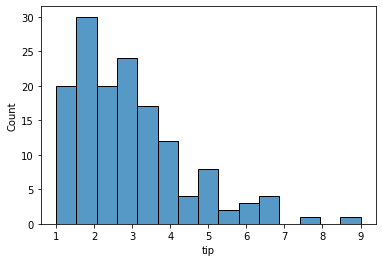

In [12]:
sns.histplot(y_train)
plt.show

In [13]:
baseline = y_train.mean()

In [14]:
baseline

2.9810958904109603

In [15]:
#base line is 2.98

In [16]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [17]:
#make an array to send into my mean_square_error function
baseline_array = np.repeat(baseline, len(train_tips))
baseline_array[:5]

array([2.98109589, 2.98109589, 2.98109589, 2.98109589, 2.98109589])

In [18]:
rmse, r2 = metrics_reg(y_train, baseline_array)

In [19]:
metrics_df = pd.DataFrame(data=[
    {
        'model':'baseline',
        'rmse':rmse,
        'r2':r2
    }
    
])
metrics_df

,model,rmse,r2
0,baseline,1.451105,2.220446e-16


In [20]:
#Ordinary Least Squares (OLS)

In [21]:
#feature selection 

In [22]:
#intial ML model
lr1 = LinearRegression()

#make it
rfe = RFE(lr1, n_features_to_select=1)

#fit it
rfe.fit(x_train, y_train)

#use it on train
x_train_rfe = rfe.transform(x_train)

#use it on validate
x_val_rfe = rfe.transform(x_validate)

In [23]:
rfe.get_feature_names_out()

AttributeError: 'RFE' object has no attribute 'get_feature_names_out'